### Preprocessing - 
Preparing the dataset

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Binarizer,Normalizer,OneHotEncoder,LabelEncoder

In [3]:
np.random.seed(5)
a = np.random.normal(0,2,10000) # 0 --> mean pointer ,2 --> bell curve(2 units in diagram),samples(rows)-10000
b = np.random.normal(5,3,10000) # 3 --> bell curve zyada falla hoga(width of the curve)
c = np.random.normal(-5,5,10000)
df = pd.DataFrame({
    'A':a,
    'B':b,
    'C':c
})
df

,A,B,C
0,0.882455,1.466990,-7.089363
1,-0.661740,0.571914,-3.105893
2,4.861542,7.828852,-1.039068
3,-0.504184,5.001904,-9.755722
4,0.219220,1.731128,-7.679528
...,...,...,...
9995,-0.068972,3.739968,-4.303864
9996,-2.167260,0.681434,-9.584910
9997,2.188712,9.860986,-9.986860
9998,0.595445,5.982577,-11.128039


<Axes: ylabel='Density'>

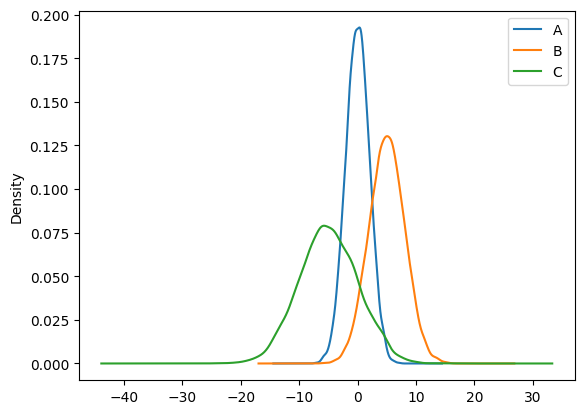

In [4]:
df.plot.kde() # kde stands for kernal density estimate

As we can see in the above graph the data distributions between a,b,c are not uniform or same , it is different so this is not right so to make it right we will be applying below solutions--

In [5]:
# Now apply standard scaler to scale the data -->
scaler = StandardScaler()

In [6]:
scaled = scaler.fit_transform(df)

In [7]:
df = pd.DataFrame(scaled,columns=['A','B','C'])

<Axes: ylabel='Density'>

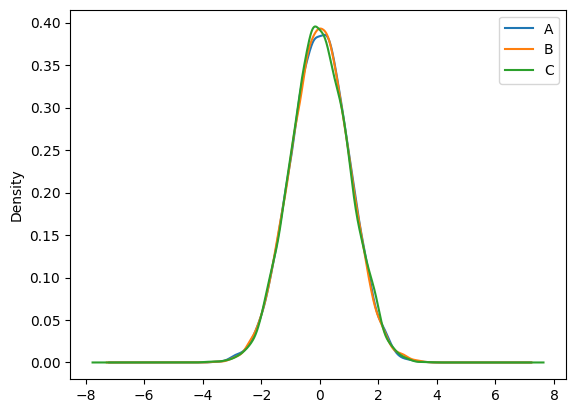

In [8]:
df.plot.kde()

Now after apllying standard scaler the data distributions are uniform as we can see in the above graph 

In [9]:
# Now applying min-max scaler -- >
minmax = MinMaxScaler() # minmax is an object of the class MinMax Scaler.
mm_scaled = minmax.fit_transform(df)

<Axes: ylabel='Density'>

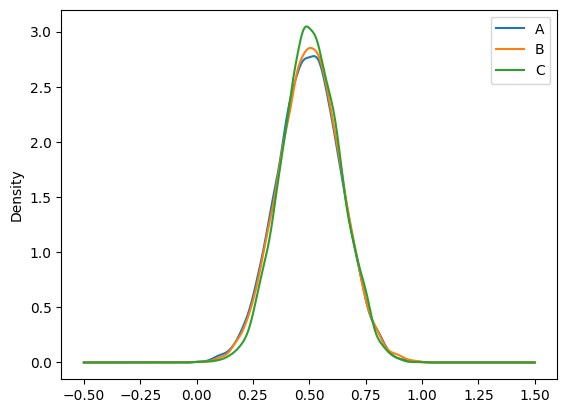

In [10]:
df = pd.DataFrame(mm_scaled,columns=['A','B','C'])
df.plot.kde()

As we can see in the above graph the value is between 0 and 1 as shown in the graph above.

In [11]:
rscaler = RobustScaler()


In [12]:
robust = rscaler.fit_transform(df)
df = pd.DataFrame(robust,columns=['A','B','C'])

<Axes: ylabel='Density'>

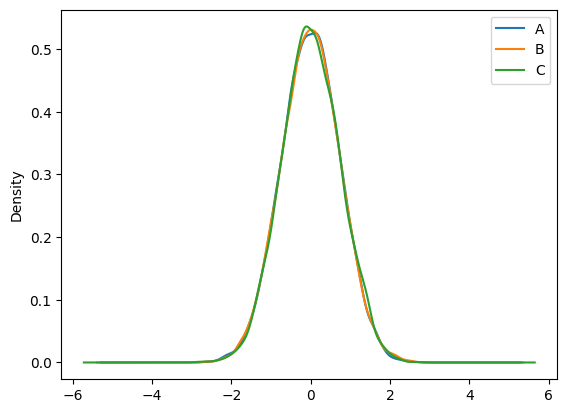

In [13]:
df.plot.kde()

In [14]:
binary = Binarizer(threshold=5)
a = np.array([[30,10,22],
             [20,2,10],
             [33,11,2]])  # Creating a random data
binary1 = binary.transform(a)
binary1

array([[1, 1, 1],
       [1, 0, 1],
       [1, 1, 0]])

In [15]:
# Manually performing normailizer method without using normalizer class-->
X = [[5,2,3],
     [2,4,10],
     [6,8,6]]
sss = [np.sqrt(np.sum(np.power(X[i],2))) for i in range(len(X))]

In [16]:
len(X)

3

In [17]:
np.array([X[k]/sss[k] for k in range(len(X))])

array([[0.81110711, 0.32444284, 0.48666426],
       [0.18257419, 0.36514837, 0.91287093],
       [0.51449576, 0.68599434, 0.51449576]])

In [18]:
normalizer = Normalizer() # using normalizer class
data_tf = normalizer.fit_transform(X)

In [19]:
data_tf

array([[0.81110711, 0.32444284, 0.48666426],
       [0.18257419, 0.36514837, 0.91287093],
       [0.51449576, 0.68599434, 0.51449576]])

In [21]:
dff = pd.read_csv("encoding.csv")
dff

,TEAM,YEAR
0,A,2000
1,B,2002
2,C,2003
3,D,2004
4,A,2005
5,C,2006
6,B,2007
7,A,2008
8,D,2009


In [23]:
le = LabelEncoder()
df1 = dff
df1.TEAM = le.fit_transform(df1.TEAM)
df1

,TEAM,YEAR
0,0,2000
1,1,2002
2,2,2003
3,3,2004
4,0,2005
5,2,2006
6,1,2007
7,0,2008
8,3,2009


In [24]:
# OneHotEncoder() -->
enc = OneHotEncoder()
enc_df1 = pd.DataFrame(enc.fit_transform(df1[['TEAM']]).toarray())
enc_df1

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0


In [25]:
abc = df1.join(enc_df1)
abc

,TEAM,YEAR,0,1,2,3
0,0,2000,1.0,0.0,0.0,0.0
1,1,2002,0.0,1.0,0.0,0.0
2,2,2003,0.0,0.0,1.0,0.0
3,3,2004,0.0,0.0,0.0,1.0
4,0,2005,1.0,0.0,0.0,0.0
5,2,2006,0.0,0.0,1.0,0.0
6,1,2007,0.0,1.0,0.0,0.0
7,0,2008,1.0,0.0,0.0,0.0
8,3,2009,0.0,0.0,0.0,1.0


Upper solution is showing data redundancy problem overload of features.

In [26]:
final = abc.drop(['TEAM'],axis='columns')
final

,YEAR,0,1,2,3
0,2000,1.0,0.0,0.0,0.0
1,2002,0.0,1.0,0.0,0.0
2,2003,0.0,0.0,1.0,0.0
3,2004,0.0,0.0,0.0,1.0
4,2005,1.0,0.0,0.0,0.0
5,2006,0.0,0.0,1.0,0.0
6,2007,0.0,1.0,0.0,0.0
7,2008,1.0,0.0,0.0,0.0
8,2009,0.0,0.0,0.0,1.0


kernal density function defines at what point the data is dense and preprocessing is used to make the data in a simple form for the machine learning model to understand.(Preprocessing is not used to change the meaning of the dataset).

- ROW WISE NORMALIZATION --> Normalization
- COLUMN WISE NORMALIZATION --> StandardScaler